In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier ,plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

загрузим данные в pd.Dataframe()

In [5]:
data = pd.DataFrame(pd.read_csv("data\\S06-hw-dataset-03.csv"))
data.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,target
0,1,-2.721419,0.652294,1.867234,-0.245331,-0.241182,-0.195509,1.180193,-0.724816,1.804165,...,0.042851,-0.153232,1.566167,-1.516125,-1.586857,-3.998937,-1.308459,2.155125,1.992519,0
1,2,-4.191520,-0.647731,-0.881929,-0.968159,3.530725,-4.858592,0.240979,-0.714017,0.285769,...,-1.170056,0.631661,1.277915,-0.464432,1.927986,6.034154,0.149833,4.861592,-3.547303,0
2,3,-0.582739,0.415128,-4.205613,-0.320853,0.313570,-2.655451,2.215387,1.492222,-0.516727,...,0.083281,-0.757912,5.672669,-0.283472,0.275362,-0.988055,0.940883,-3.050749,-0.703865,1
3,4,-1.766082,1.253523,1.610804,0.466067,3.837868,-3.564073,-1.831031,1.066265,-0.198636,...,-0.674648,1.780285,-4.718432,0.711573,1.705610,6.474380,-1.690537,8.687735,-2.799399,0
4,5,-2.157834,-1.361285,-0.917199,0.937285,0.408551,-0.062032,-0.480196,-0.554454,-1.026434,...,-0.096277,0.212875,1.710699,2.476220,0.669305,3.166072,-0.718493,3.630457,0.083986,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      15000 non-null  int64  
 1   f01     15000 non-null  float64
 2   f02     15000 non-null  float64
 3   f03     15000 non-null  float64
 4   f04     15000 non-null  float64
 5   f05     15000 non-null  float64
 6   f06     15000 non-null  float64
 7   f07     15000 non-null  float64
 8   f08     15000 non-null  float64
 9   f09     15000 non-null  float64
 10  f10     15000 non-null  float64
 11  f11     15000 non-null  float64
 12  f12     15000 non-null  float64
 13  f13     15000 non-null  float64
 14  f14     15000 non-null  float64
 15  f15     15000 non-null  float64
 16  f16     15000 non-null  float64
 17  f17     15000 non-null  float64
 18  f18     15000 non-null  float64
 19  f19     15000 non-null  float64
 20  f20     15000 non-null  float64
 21  f21     15000 non-null  float64
 22

In [7]:
data.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,target
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,-0.840416,-0.011530,0.755463,0.008092,-0.246559,0.992538,-0.004599,-0.005366,0.011024,...,0.008801,0.004798,-0.060611,-0.008095,0.002397,0.699377,-0.001170,1.380216,0.150765,0.612600
std,4330.271354,1.785432,1.007374,3.663136,0.996556,2.216202,3.943110,2.113607,1.001960,1.006309,...,0.988931,0.999959,3.747823,0.994912,0.990567,3.801468,0.996588,3.929134,2.005847,0.740016
min,1.000000,-8.199174,-4.100091,-13.591257,-3.992807,-8.243563,-14.950758,-8.522298,-3.768197,-3.791645,...,-3.612116,-4.150852,-15.977469,-3.664246,-3.857890,-16.273835,-4.536600,-12.105957,-8.300728,0.000000
25%,3750.750000,-2.029608,-0.686265,-1.593729,-0.674039,-1.738188,-1.580544,-1.380091,-0.673001,-0.661451,...,-0.674236,-0.669654,-2.517892,-0.676471,-0.661098,-1.842677,-0.668133,-1.339314,-1.235425,0.000000
50%,7500.500000,-0.855943,-0.010454,0.744919,0.009431,-0.203512,1.110848,0.134466,-0.003663,0.004158,...,0.020916,0.010701,0.019034,-0.001622,0.001807,0.780608,-0.007763,1.108728,0.137089,0.000000
75%,11250.250000,0.313482,0.674347,3.057234,0.677459,1.254102,3.700201,1.443666,0.662753,0.683465,...,0.681036,0.676786,2.521745,0.659456,0.663270,3.297387,0.676626,3.869991,1.524830,1.000000
max,15000.000000,7.338969,4.418126,17.965154,3.887820,8.542916,15.618988,7.575797,3.698010,3.963730,...,3.497004,3.828639,12.661894,4.214633,4.378893,17.152063,3.618447,18.906060,8.007400,2.000000


посмотрим распределение target в нашем датасете и проверим наличие пустых или дублирующих записей

In [15]:
print(data["target"].value_counts(normalize=1, sort=1))

target
0    0.542533
1    0.302333
2    0.155133
Name: proportion, dtype: float64


In [9]:
data.isna().sum()

id        0
f01       0
f02       0
f03       0
f04       0
f05       0
f06       0
f07       0
f08       0
f09       0
f10       0
f11       0
f12       0
f13       0
f14       0
f15       0
f16       0
f17       0
f18       0
f19       0
f20       0
f21       0
f22       0
f23       0
f24       0
f25       0
f26       0
f27       0
f28       0
target    0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

определим признаки и таргеты

In [18]:
Y = data['target']
X = data.drop(columns=["target", "id"])

разобъем данные на тестовую и тренировочную выборки

In [19]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,Y, test_size=0.25,random_state=RANDOM_STATE, stratify=Y)

реализуем два baseline'а и посчитаем метрики на test. Для вывода мтерик позаимствуем функцию из обучающего ноутбука изменив её для работы с мультиклассами, как в используемом мной датасете

In [58]:
def print_metrics(y_true, y_pred, y_proba=None, title=None):
    if title:
        print(title)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"accuracy = {acc:.4f}")
    print(f"f1       = {f1:.4f}")
    if y_proba is not None:
        try:
            auc = roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro")
            print(f"roc_auc  = {auc:.4f}")
        except Exception:
            pass
    print("confusion_matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()


model_dummy = DummyClassifier(strategy="most_frequent")
model_dummy.fit(Train_X, Train_Y)
predictions = model_dummy.predict(Test_X)

print_metrics(Test_Y, predictions, "Tabular – DummyClassifier (baseline)")

accuracy = 0.5424
f1       = 0.2344
confusion_matrix:
[[2034    0    0]
 [1134    0    0]
 [ 582    0    0]]



In [59]:
model_logreg = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ]
)

model_logreg.fit(Train_X,Train_Y)

proba_test = model_logreg.predict_proba(Test_X)

pred_test = model_logreg.predict(Test_X)

print_metrics(Test_Y, pred_test, proba_test, "Tabular – LogisticRegression (baseline)")

Tabular – LogisticRegression (baseline)
accuracy = 0.7200
f1       = 0.6633
roc_auc  = 0.8468
confusion_matrix:
[[1734  219   81]
 [ 392  687   55]
 [ 139  164  279]]



Построим три модели DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier и сравним их

In [87]:
tree_full = DecisionTreeClassifier(random_state=RANDOM_STATE)

path = tree_full.cost_complexity_pruning_path(Train_X,Train_Y)
alphas = path.ccp_alphas

if len(alphas) > 100:
    alphas = alphas[:: max(1, len(alphas)//100)]

test_scores = []
models =[]
for a in alphas:
    dt = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=a)
    dt.fit(Train_X, Train_Y)
    models.append(dt)
    test_scores.append(accuracy_score(Test_Y, dt.predict(Test_X)))
best_ind = int(np.argmax(test_scores))
best_dt = models[best_ind]

pred_test_dt = best_dt.predict(Test_X)

proba_test_dt = best_dt.predict_proba(Test_X)


param_grid = {'max_features': [i for i in range(1,20,5)],
              'min_samples_leaf': [i for i in range(1,100, 10)],
               'max_depth': [i for i in range(1,20, 5)] }

grid = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid,
    cv=5,              
    scoring='f1_macro',  
    n_jobs=-1
)

grid.fit(Train_X, Train_Y)

best_rf = grid.best_estimator_

pred_test_rf = best_rf.predict(Test_X)

proba_test_rf = best_rf.predict_proba(Test_X)

print_metrics(Test_Y, pred_test_dt, proba_test_dt, "Tabular – DecisionTreeClassifier)")
print_metrics(Test_Y, pred_test_rf, proba_test_rf, "Tabular – RandomForestClassifier)")


Tabular – DecisionTreeClassifier)
accuracy = 0.8088
f1       = 0.7646
roc_auc  = 0.8672
confusion_matrix:
[[1820  135   79]
 [ 206  851   77]
 [ 105  115  362]]

Tabular – RandomForestClassifier)
accuracy = 0.8851
f1       = 0.8575
roc_auc  = 0.9510
confusion_matrix:
[[1955   55   24]
 [ 164  954   16]
 [  83   89  410]]



In [76]:
model = GradientBoostingClassifier(n_estimators=300,
    learning_rate=0.05,
    max_depth=2,
    random_state=RANDOM_STATE)

model.fit(Train_X, Train_Y)

pred_test_gb = model.predict(Test_X)

proba_test_gb = model.predict_proba(Test_X)

print_metrics(Test_Y, pred_test_gb, proba_test_gb, "Tabular – GradientBoostingClassifier)")

Tabular – GradientBoostingClassifier)
accuracy = 0.7891
f1       = 0.7368
roc_auc  = 0.9076
confusion_matrix:
[[1847  127   60]
 [ 295  805   34]
 [ 129  146  307]]



Определим лучшую модель по f1_macro и посчитаем permutation importance для top-15 признаков

In [83]:
metrics_results = {}

acc_dummy = accuracy_score(Test_Y, predictions)
f1_dummy = f1_score(Test_Y, predictions, average='macro')
try:
    auc_dummy = roc_auc_score(Test_Y, model_dummy.predict_proba(Test_X), multi_class="ovr", average="macro")
except:
    auc_dummy = None

metrics_results['DummyClassifier'] = {
    'accuracy': acc_dummy,
    'f1_macro': f1_dummy,
    'roc_auc_macro': auc_dummy
}

acc_logreg = accuracy_score(Test_Y, pred_test)
f1_logreg = f1_score(Test_Y, pred_test, average='macro')
try:
    auc_logreg = roc_auc_score(Test_Y, proba_test, multi_class="ovr", average="macro")
except:
    auc_logreg = None

metrics_results['LogisticRegression'] = {
    'accuracy': acc_logreg,
    'f1_macro': f1_logreg,
    'roc_auc_macro': auc_logreg
}

acc_dt = accuracy_score(Test_Y, pred_test_dt)
f1_dt = f1_score(Test_Y, pred_test_dt, average='macro')
try:
    auc_dt = roc_auc_score(Test_Y, proba_test_dt, multi_class="ovr", average="macro")
except:
    auc_dt = None

metrics_results['DecisionTreeClassifier'] = {
    'accuracy': acc_dt,
    'f1_macro': f1_dt,
    'roc_auc_macro': auc_dt
}


acc_rf = accuracy_score(Test_Y, pred_test_rf)
f1_rf = f1_score(Test_Y, pred_test_rf, average='macro')
try:
    auc_rf = roc_auc_score(Test_Y, proba_test_rf, multi_class="ovr", average="macro")
except:
    auc_rf = None

metrics_results['RandomForestClassifier'] = {
    'accuracy': acc_rf,
    'f1_macro': f1_rf,
    'roc_auc_macro': auc_rf
}

acc_gb = accuracy_score(Test_Y, pred_test_gb)
f1_gb = f1_score(Test_Y, pred_test_gb, average='macro')
try:
    auc_gb = roc_auc_score(Test_Y, proba_test_gb, multi_class="ovr", average="macro")
except:
    auc_gb = None

metrics_results['GradientBoostingClassifier'] = {
    'accuracy': acc_gb,
    'f1_macro': f1_gb,
    'roc_auc_macro': auc_gb
}


metrics_df = pd.DataFrame(metrics_results).T
print("Метрики всех моделей на test выборке:")
print(metrics_df)
print()

best_model_name = metrics_df['f1_macro'].idxmax()
best_model_f1 = metrics_df.loc[best_model_name, 'f1_macro']

print(f"Лучшая модель по f1_macro: {best_model_name} (f1={best_model_f1:.4f})")
print()

Метрики всех моделей на test выборке:
                            accuracy  f1_macro  roc_auc_macro
DummyClassifier             0.542400  0.234440       0.500000
LogisticRegression          0.808800  0.764551       0.867169
DecisionTreeClassifier      0.808800  0.764551       0.867169
RandomForestClassifier      0.885067  0.857484       0.951021
GradientBoostingClassifier  0.789067  0.736846       0.907592

Лучшая модель по f1_macro: RandomForestClassifier (f1=0.8575)



In [84]:
if best_model_name == 'DummyClassifier':
    best_model_instance = model_dummy
elif best_model_name == 'LogisticRegression':
    best_model_instance = model_logreg
elif best_model_name == 'DecisionTreeClassifier':
    best_model_instance = best_dt
elif best_model_name == 'RandomForestClassifier':
    best_model_instance = best_rf
elif best_model_name == 'GradientBoostingClassifier':
    best_model_instance = model

print(f"Используем модель: {best_model_name}")
print()

Используем модель: RandomForestClassifier



In [85]:
if isinstance(best_model_instance, Pipeline):
    actual_model = best_model_instance.named_steps['model']
else:
    actual_model = best_model_instance

perm_importance = permutation_importance(
    actual_model, 
    Test_X, 
    Test_Y, 
    n_repeats=10,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print(f"Permutation Importance для модели {best_model_name}:")
print("Top-15 признаков:")
print(importance_df.head(15).to_string(index=False))
print()

top_15_importance = importance_df.head(15)

Permutation Importance для модели RandomForestClassifier:
Top-15 признаков:
Feature  Importance      Std
    f13    0.131067 0.002999
    f05    0.094533 0.003843
    f28    0.059680 0.003052
    f12    0.046027 0.001588
    f15    0.044853 0.003119
    f01    0.044587 0.002921
    f18    0.038133 0.002361
    f10    0.036907 0.002797
    f11    0.024267 0.002020
    f17    0.023173 0.001730
    f27    0.020667 0.001986
    f07    0.019413 0.001517
    f06    0.019040 0.001938
    f22    0.007867 0.001158
    f25    0.006933 0.001119



Визуализация результатов

In [90]:
import json
import joblib
from pathlib import Path


artifacts_dir = Path("artifacts")
figures_dir = artifacts_dir / "figures"
artifacts_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)


metrics_json = {}
for model_name, metrics in metrics_results.items():
    metrics_json[model_name] = {
        'accuracy': float(metrics['accuracy']),
        'f1_macro': float(metrics['f1_macro']),
        'roc_auc_macro': float(metrics['roc_auc_macro']) if metrics['roc_auc_macro'] is not None else None
    }

with open(artifacts_dir / "metrics_test.json", 'w') as f:
    json.dump(metrics_json, f, indent=2)

search_summaries = {}

search_summaries['RandomForestClassifier'] = {
    'best_params': grid.best_params_,
    'best_cv_score': float(grid.best_score_),
    'cv_folds': 5
}

with open(artifacts_dir / "search_summaries.json", 'w') as f:
    json.dump(search_summaries, f, indent=2, default=str)


joblib.dump(best_model_instance, artifacts_dir / "best_model.joblib")

best_model_meta = {
    'model_name': best_model_name,
    'test_accuracy': float(metrics_results[best_model_name]['accuracy']),
    'test_f1_macro': float(metrics_results[best_model_name]['f1_macro']),
    'test_roc_auc_macro': float(metrics_results[best_model_name]['roc_auc_macro']) if metrics_results[best_model_name]['roc_auc_macro'] is not None else None,
}

if best_model_name == 'RandomForestClassifier':
    best_model_meta['parameters'] = grid.best_params_

with open(artifacts_dir / "best_model_meta.json", 'w') as f:
    json.dump(best_model_meta, f, indent=2)

importance_df.to_csv(artifacts_dir / "permutation_importance.csv", index=False)

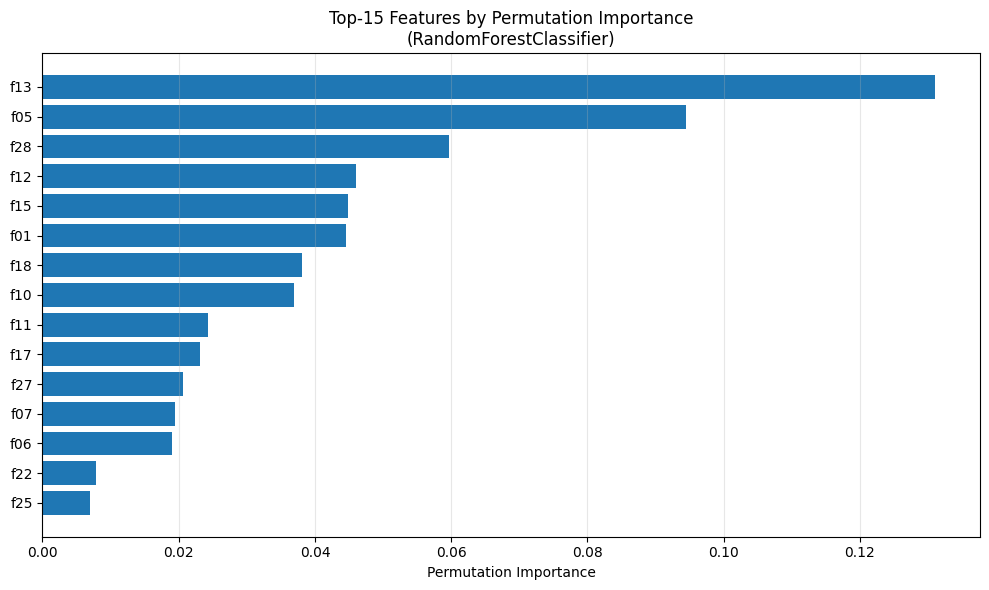

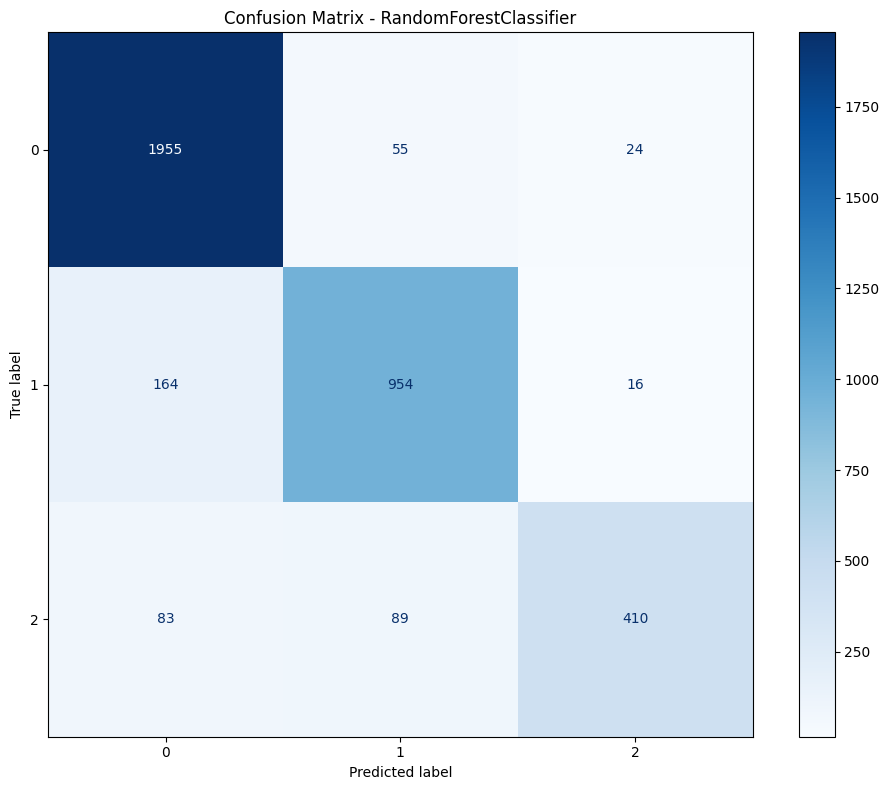

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
top_15_importance_sorted = top_15_importance.sort_values('Importance')
ax.barh(top_15_importance_sorted['Feature'], top_15_importance_sorted['Importance'], capsize=3)
ax.set_xlabel('Permutation Importance')
ax.set_title(f'Top-15 Features by Permutation Importance\n({best_model_name})')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(figures_dir / "permutation_importance.png", dpi=300, bbox_inches='tight')
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay


if best_model_name == 'DummyClassifier':
    best_pred = predictions
elif best_model_name == 'LogisticRegression':
    best_pred = pred_test
elif best_model_name == 'DecisionTreeClassifier':
    best_pred = pred_test_dt
elif best_model_name == 'RandomForestClassifier':
    best_pred = pred_test_rf
elif best_model_name == 'GradientBoostingClassifier':
    best_pred = pred_test_gb


fig, ax = plt.subplots(figsize=(10, 8))
cm = confusion_matrix(Test_Y, best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(Test_Y))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.savefig(figures_dir / "confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()